In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle as pkl
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

%matplotlib inline
sns.set_theme()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pranav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
df = pd.read_csv("data/analyst_ratings_processed.csv").drop("Unnamed: 0", axis=1)
df["date"] = pd.to_datetime(df["date"], utc=True)

In [47]:
df

,title,date,stock,sentiment
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 14:30:00+00:00,A,0.0000
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 14:45:00+00:00,A,0.0000
2,71 Biggest Movers From Friday,2020-05-26 08:30:00+00:00,A,0.0000
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 16:45:00+00:00,A,0.0000
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 15:38:00+00:00,A,0.2960
...,...,...,...,...
1399175,Top Narrow Based Indexes For August 29,2011-08-29 14:41:00+00:00,ZX,0.2023
1399176,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 20:44:00+00:00,ZX,-0.3818
1399177,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 12:26:00+00:00,ZX,0.0000
1399178,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 09:59:00+00:00,ZX,0.0000


In [23]:
sid = SentimentIntensityAnalyzer()

In [32]:
df["sentiment"] = df.apply(lambda x: sid.polarity_scores(x["title"])["compound"], axis=1)

<Axes: xlabel='sentiment', ylabel='Count'>

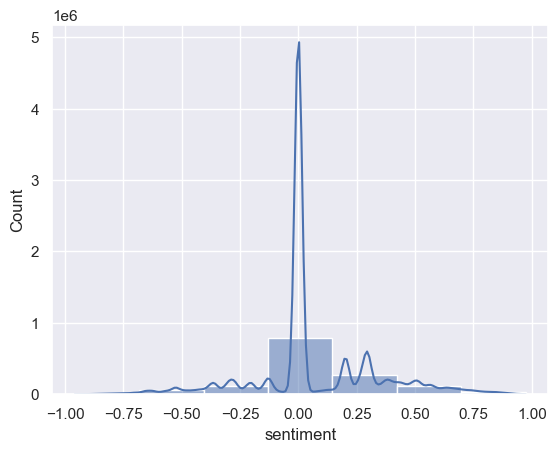

In [45]:
sns.histplot(data=df, x="sentiment", bins=7, kde=True)

<Axes: xlabel='sentiment'>

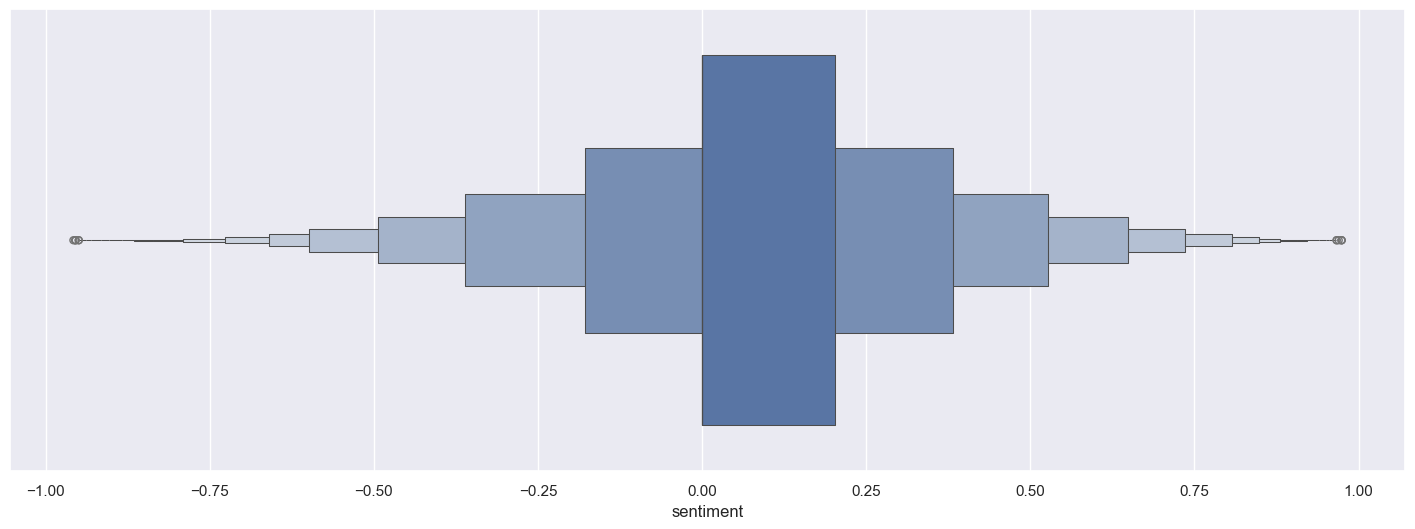

In [69]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxenplot(data=df, x="sentiment", ax=ax)

In [70]:
df = df.drop("title", axis=1)

In [72]:
with open("data/analyst_ratings_processed.pkl", "wb") as f:
    pkl.dump(df, f)